# Resolução do Case 
### Processo Seletivo Trybe: Vaga Lead Data Analyst

###### Plano para resolução
1 - Importação de cada base de dados e avaliação da qualidade dos dados em cada uma.

2 - Definição do perfil de estudantes por:
    2.1 - Simples, por:
        2.1.1 - idades: distribuição por intervalos de idades, demonstração por histograma (em valores absolutos)
        2.1.2 - gêneros: distribuição por gêneros, demonstração por barras contíguas (em porcentagens)
        2.1.3 - educação: distribuição por menor-maior educação obtida, por histograma (em porcentagens)
        2.1.4 - deficiência: distribuição por sinalização de deficiência, em número/texto
        2.1.5 - pobreza: distribuição por faixa IMD, por histograma (em porcentagens)
        2.1.6 - regiões: distribuição por regiões, demonstração por mapa (em porcentagens)
        
3 - Avaliação de variáveis alvo (VA) e previsoras (VP), *básica*: criação da matriz de correlação das variáveis.
    3.1 - VA: Desempenho - "score" no _df_ de _assessments_
        3.1.1 - VP1: idades
        3.1.2 - VP2: gêneros
        3.1.3 - VP3: educação
        3.1.4 - VP4: deficiência
        3.1.5 - VP5: pobreza
        3.1.5 - VP6: regiões

In [96]:
#Importando as bibliotecas necessárias para o desenvolvimento do carregamento, limpeza e análise exploratória dos dados.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 

##### Importando e avaliando a importação de cada arquivo

In [33]:
#importações
stdinfo_df = pd.read_csv(r'C:\Users\SAMSUNG.LAPTOP-NJ45Q4AN\Desktop\Desafios\Trybe\anonymisedData\studentInfo.csv')
stdassessment_df = pd.read_csv(r'C:\Users\SAMSUNG.LAPTOP-NJ45Q4AN\Desktop\Desafios\Trybe\anonymisedData\studentAssessment.csv')
assessments_df = pd.read_csv(r'C:\Users\SAMSUNG.LAPTOP-NJ45Q4AN\Desktop\Desafios\Trybe\anonymisedData\assessments.csv')
courses_df = pd.read_csv(r'C:\Users\SAMSUNG.LAPTOP-NJ45Q4AN\Desktop\Desafios\Trybe\anonymisedData\courses.csv')
stdregistration_df = pd.read_csv(r'C:\Users\SAMSUNG.LAPTOP-NJ45Q4AN\Desktop\Desafios\Trybe\anonymisedData\studentRegistration.csv')
stdvle_df = pd.read_csv(r'C:\Users\SAMSUNG.LAPTOP-NJ45Q4AN\Desktop\Desafios\Trybe\anonymisedData\studentVle.csv')
vle_df = pd.read_csv(r'C:\Users\SAMSUNG.LAPTOP-NJ45Q4AN\Desktop\Desafios\Trybe\anonymisedData\vle.csv')

In [48]:
stdinfo_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [49]:
stdinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [4]:
stdassessment_df.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [50]:
stdassessment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [108]:
assessments_df.head(6)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0


In [51]:
assessments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [141]:
#Limpeza dos dados da planilha de assessments

for i in range(0,assessments_df.shape[0]):
    if assessments_df[[i]]['assessment_type'].values[0]=='Exam':
        code_module = assessments_df.iloc[[i]]['code_module'].values[0]
        code_presentation = assessments_df.iloc[[i]]['code_presentation'].values[0]
        
        module_presentation_length = courses_df[(courses_df['code_module']==code_module)&(courses_df['code_presentation'==code_presentation]['module_presentation_length']).values[0]]
        
        assessments_df.at[i, 'date'] = module_presentation_length
                                                    
assessments_df.head(6)

KeyError: "None of [Int64Index([0], dtype='int64')] are in the [columns]"

In [6]:
courses_df.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [7]:
stdregistration_df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [8]:
stdvle_df.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [9]:
vle_df.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [23]:
stdinfo_df.groupby('region')['id_student'].count()

region
East Anglian Region     3340
East Midlands Region    2365
Ireland                 1184
London Region           3216
North Region            1823
North Western Region    2906
Scotland                3446
South East Region       2111
South Region            3092
South West Region       2436
Wales                   2086
West Midlands Region    2582
Yorkshire Region        2006
Name: id_student, dtype: int64

In [22]:
stdinfo_df.groupby('gender')['id_student'].count()

gender
F    14718
M    17875
Name: id_student, dtype: int64

In [29]:
stdinfo_df.groupby('age_band')['id_student'].count()

age_band
0-35     22944
35-55     9433
55<=       216
Name: id_student, dtype: int64

In [31]:
stdinfo_df.groupby('highest_education')['id_student'].count()

highest_education
A Level or Equivalent          14045
HE Qualification                4730
Lower Than A Level             13158
No Formal quals                  347
Post Graduate Qualification      313
Name: id_student, dtype: int64

In [37]:
stdinfo_df.groupby('disability')['id_student'].count()

disability
N    29429
Y     3164
Name: id_student, dtype: int64

In [39]:
stdinfo_df.groupby('final_result')['id_student'].count()

final_result
Distinction     3024
Fail            7052
Pass           12361
Withdrawn      10156
Name: id_student, dtype: int64

Text(0.5, 1.0, 'Porcentagem de estudantes por gênero')

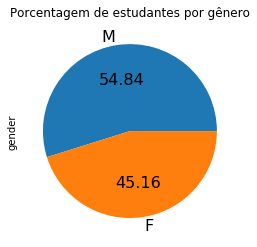

In [101]:
plt.figure()
g = stdinfo_df.gender.value_counts()/len(stdinfo_df)
g.plot.pie(autopct='%.2f', fontsize=16)
plt.title('Porcentagem de estudantes por gênero')

Text(0.5, 1.0, 'Porcentagem de estudantes por autodeclaração de deficiência')

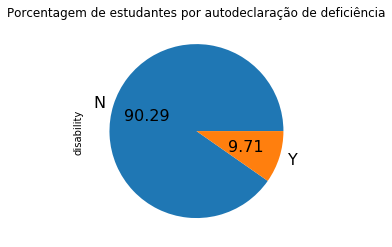

In [60]:
plt.figure()
g = stdinfo_df.disability.value_counts()/len(stdinfo_df)
g.plot.pie(autopct='%.2f', fontsize=16)
plt.title('Porcentagem de estudantes por autodeclaração de deficiência')


Text(0.5, 1.0, 'Distribuição por região de origem')

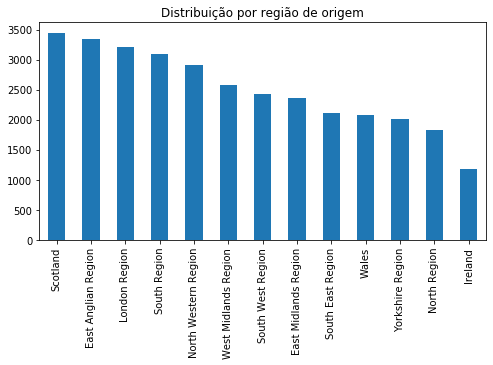

In [118]:
plt.figure()
stdinfo_df['region'].value_counts().plot.bar(figsize=(8,4))
plt.title('Distribuição por região de origem')

<Figure size 432x288 with 0 Axes>

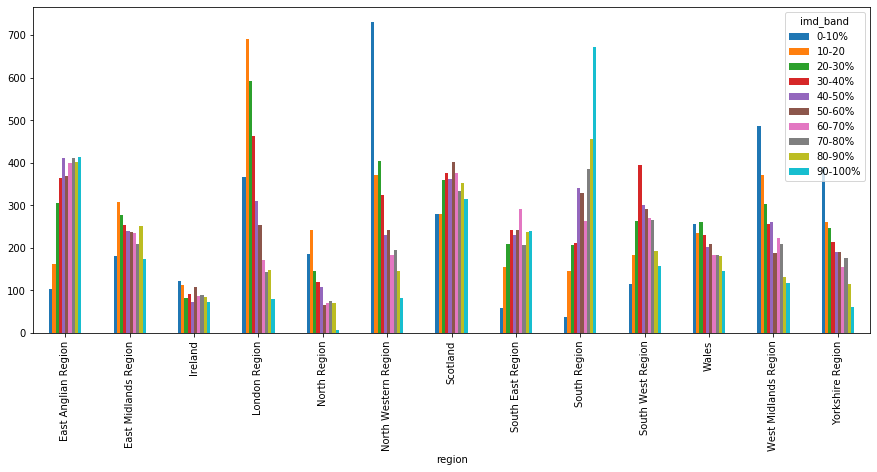

In [132]:
plt.figure()
stdinfo_df.groupby(['region', 'imd_band']).size().unstack().plot(kind='bar', figsize=(15,6))

Text(0.5, 1.0, 'Distribuição de estudantes por resultado final obtido')

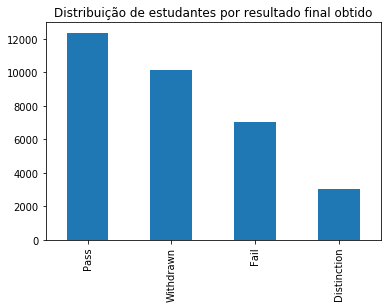

In [103]:
plt.figure()
stdinfo_df['final_result'].value_counts().plot.bar()
plt.title('Distribuição de estudantes por resultado final obtido')

Text(0.5, 1.0, 'Distribuição de estudantes por Resultado final e gêneros')

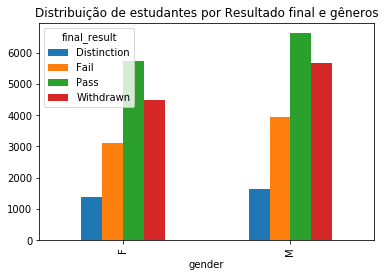

In [110]:
stdinfo_df.groupby(['gender','final_result']).size().unstack().plot(kind='bar')
plt.title('Distribuição de estudantes por Resultado final e gêneros')

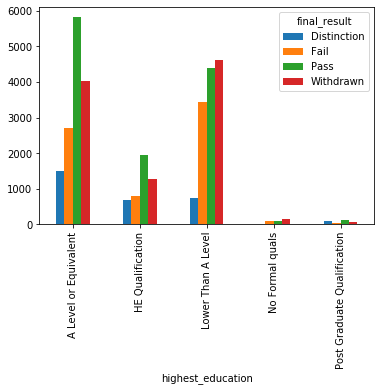

In [107]:
stdinfo_df.groupby(['highest_education','final_result']).size().unstack().plot(kind='bar')